In [1]:
# 🏥 Hospital Readmission Analysis
# Dataset: Diabetes 130-Hospitals Readmission Dataset

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

# 📥 Load Dataset
df = pd.read_csv("diabetic_data.csv")
print("Shape:", df.shape)
df.head()

Shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Drop irrelevant or high-missing columns
df.drop(columns=["weight", "payer_code", "medical_specialty", "encounter_id", "patient_nbr"], inplace=True)

# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Check missing values
df.isnull().sum()

# Drop rows with missing gender or race (optional)
df.dropna(subset=["race", "gender"], inplace=True)

# Remove 'Unknown/Invalid' gender
df = df[df["gender"] != "Unknown/Invalid"]

In [10]:
# Safe extraction of age midpoint for analysis
df["age_mid"] = df["age"].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

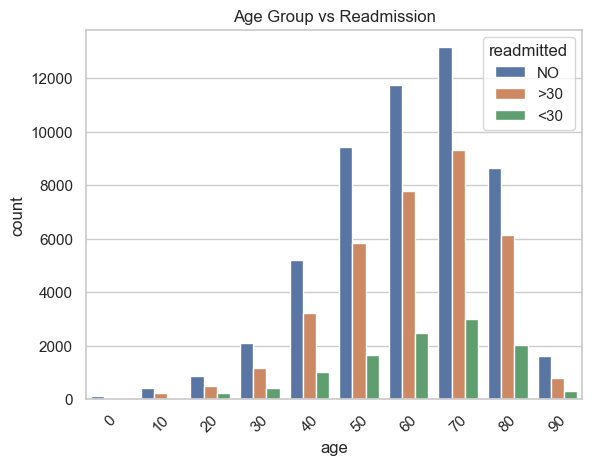

In [12]:
# Bar chart of readmissions by age bracket
sns.countplot(data=df, x="age", hue="readmitted")
plt.title("Age Group vs Readmission")
plt.xticks(rotation=45)
plt.show()

In [14]:
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', 
             '[60-70)', '[70-80)', '[80-90)', '[90-100)']

df["age"] = pd.Categorical(df["age"], categories=age_order, ordered=True)

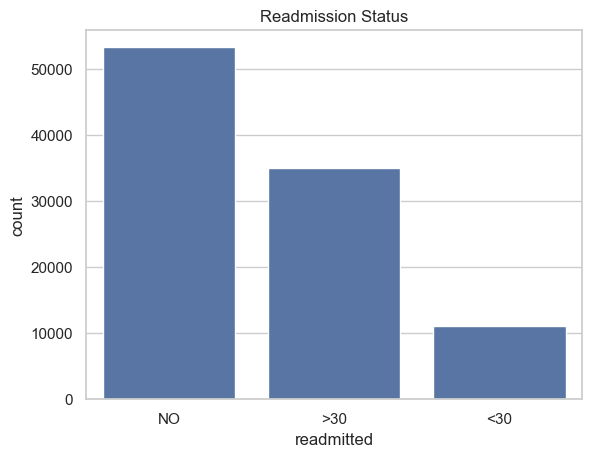

In [18]:
# Readmission distribution
sns.countplot(x='readmitted', data=df)
plt.title("Readmission Status")
plt.show()

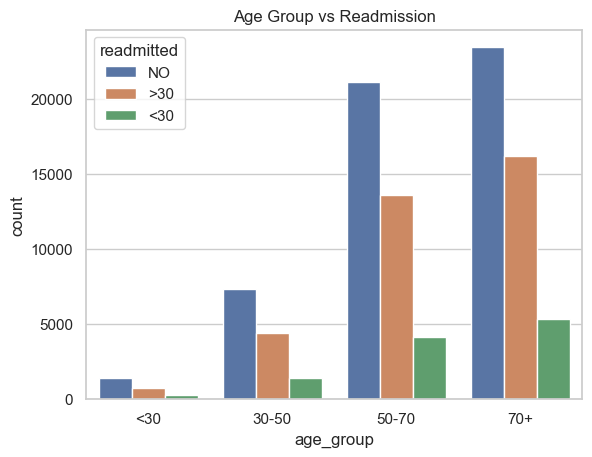

In [20]:
# Age vs Readmission
sns.countplot(x='age_group', hue='readmitted', data=df)
plt.title("Age Group vs Readmission")
plt.show()

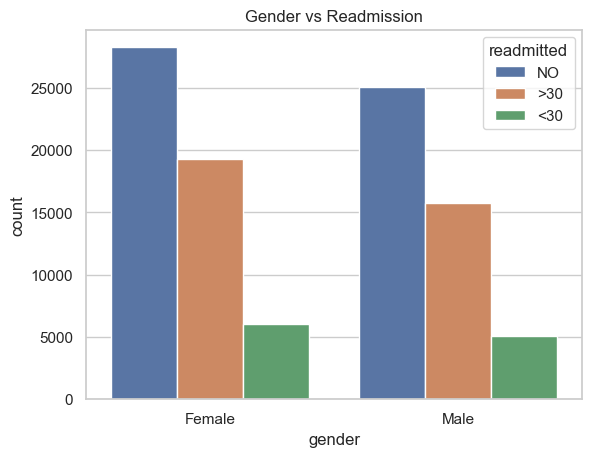

In [22]:
# Gender vs Readmission
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title("Gender vs Readmission")
plt.show()

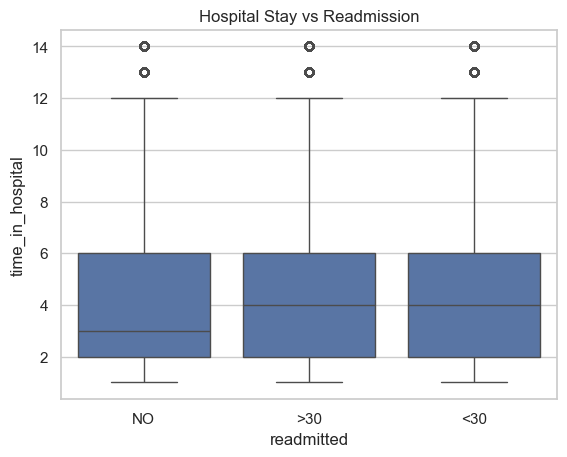

In [24]:
# Average hospital stay vs readmission
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title("Hospital Stay vs Readmission")
plt.show()

C:\Users\rahim\AppData\Local\Temp\ipykernel_16156\436462199.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values='readmit_flag', index='gender', columns='age_group', aggfunc='mean')


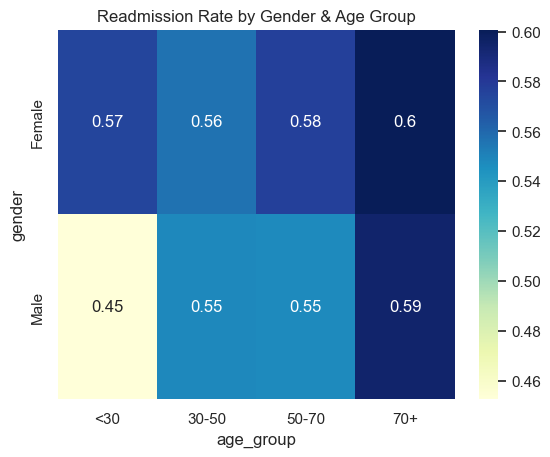

In [26]:
# Pivot table: readmission rate by gender & age group
pivot = pd.pivot_table(df, values='readmit_flag', index='gender', columns='age_group', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Readmission Rate by Gender & Age Group")
plt.show()

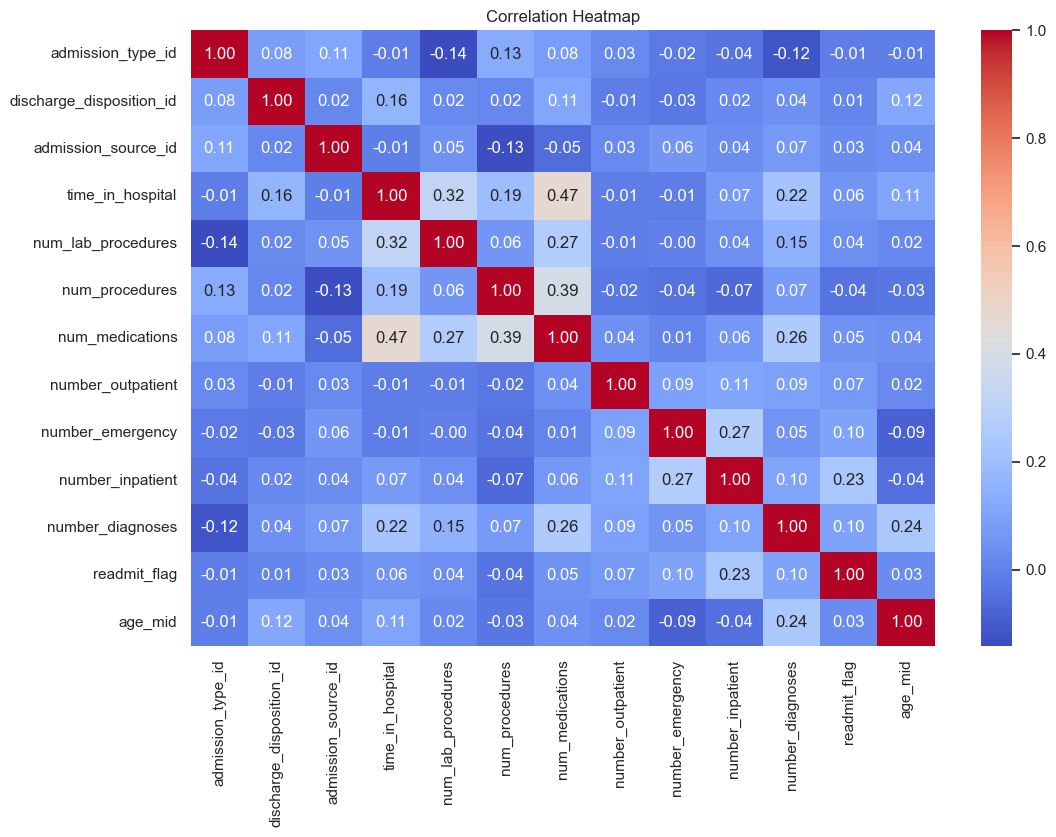

In [32]:
# Select numeric columns
num_cols = df.select_dtypes(include=np.number)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# Summarize key insights
insights = {
    "High readmission": "Patients <30 days show different trends in age/medication.",
    "Age factor": "Higher readmission seen in patients aged 70+.",
    "Gender insight": "Slightly higher readmission among females.",
    "Medication": "More medications or changes → more readmissions?",
}

for k, v in insights.items():
    print(f"• {k}: {v}")

• High readmission: Patients <30 days show different trends in age/medication.
• Age factor: Higher readmission seen in patients aged 70+.
• Gender insight: Slightly higher readmission among females.
• Medication: More medications or changes → more readmissions?


In [36]:
df.to_csv("cleaned_hospital_readmission.csv", index=False)